In [5]:
import os
import re
#import ROOT
import hist
from hist import Hist
from hist.axis import IntCategory, Regular, StrCategory
import pickle
import mplhep as hep
from glob import glob
import numpy as np
import awkward as ak
from tabulate import tabulate
from IPython import embed
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
import iminuit
from iminuit import Minuit
from iminuit.cost import LeastSquares
hep.style.use('CMS')
print('iminuit version:', iminuit.__version__)
import itertools
from collections import defaultdict
import glob

iminuit version: 2.30.1


In [6]:
## Load the data_storage from the previous run

if os.path.exists('data_storage_DesyTau.pkl'):
    with open('data_storage_DesyTau.pkl', 'rb') as file:
        data_storage_dict = pickle.load(file)
    # Convert to defaultdict (optional, if you need default values)
    data_storage = defaultdict(lambda: {'values': [], 'err': [], 'colour': None, 'location': None})
    # Load the data and update it
    data_storage.update(data_storage_dict)
else:
    data_storage = defaultdict(lambda: {'values': [], 'err': [], 'colour': None, 'location': None})
#data_storage

Loading file: INPUT/04_DesyTau_phi_reorder_main_struc/ggF/cpo/all_configs_hist__var_phi_cp_mu_a1_3pr_pv_mtt.pickle
Loading file: INPUT/04_DesyTau_phi_reorder_main_struc/ggF/mm/all_configs_hist__var_phi_cp_mu_a1_3pr_pv_mtt.pickle
Loading file: INPUT/04_DesyTau_phi_reorder_main_struc/ggF/sm/all_configs_hist__var_phi_cp_mu_a1_3pr_pv_mtt.pickle
✅ Bereits vorhanden: INPUT/04_DesyTau_phi_reorder_main_struc/ggF/combined_pickles/cp_all_all_configs_hist__var_phi_cp_mu_a1_3pr_pv_mtt.pickle, skip
Loading file: INPUT/04_DesyTau_phi_reorder_main_struc/ggF/cpo/all_configs_hist__var_phi_cp_mu_a1_3pr_pv_gef.pickle
Loading file: INPUT/04_DesyTau_phi_reorder_main_struc/ggF/mm/all_configs_hist__var_phi_cp_mu_a1_3pr_pv_gef.pickle
Loading file: INPUT/04_DesyTau_phi_reorder_main_struc/ggF/sm/all_configs_hist__var_phi_cp_mu_a1_3pr_pv_gef.pickle
✅ Bereits vorhanden: INPUT/04_DesyTau_phi_reorder_main_struc/ggF/combined_pickles/cp_all_all_configs_hist__var_phi_cp_mu_a1_3pr_pv_gef.pickle, skip
Loading file: INPU

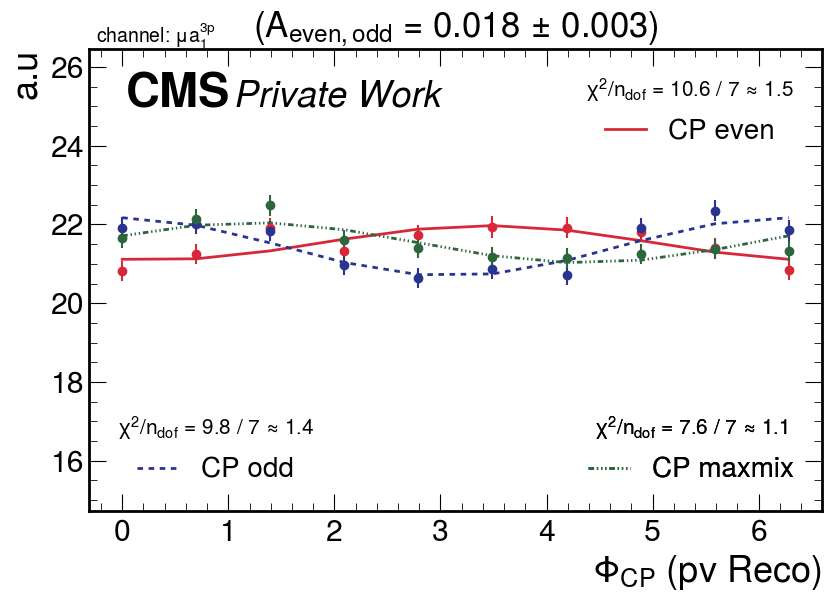

Checking file: INPUT/04_DesyTau_phi_reorder_main_struc/ggF/combined_pickles/cp_all_all_configs_hist__var_phi_cp_mu_a1_3pr_dp_reco.pickle, looking for tag: pv
Skipping: INPUT/04_DesyTau_phi_reorder_main_struc/ggF/combined_pickles/cp_all_all_configs_hist__var_phi_cp_mu_a1_3pr_dp_reco.pickle
Checking file: INPUT/04_DesyTau_phi_reorder_main_struc/ggF/combined_pickles/cp_all_all_configs_hist__var_phi_cp_mu_a1_3pr_pv_gef.pickle, looking for tag: pv
Take file: INPUT/04_DesyTau_phi_reorder_main_struc/ggF/combined_pickles/cp_all_all_configs_hist__var_phi_cp_mu_a1_3pr_pv_gef.pickle
>>>---- Processing file : INPUT/04_DesyTau_phi_reorder_main_struc/ggF/combined_pickles/cp_all_all_configs_hist__var_phi_cp_mu_a1_3pr_pv_gef.pickle --->>>
>>>---- Tag & is_gen : pv GEF
combo_name :  cp_even_vs_cp_maxmix
combo_name :  cp_even_vs_cp_odd
combo_name :  cp_maxmix_vs_cp_odd


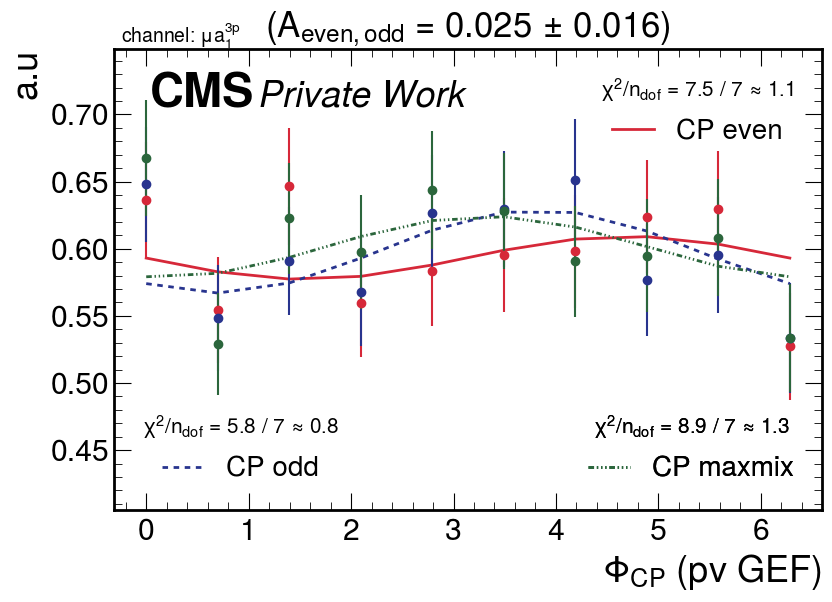

Checking file: INPUT/04_DesyTau_phi_reorder_main_struc/ggF/combined_pickles/cp_all_all_configs_hist__var_phi_cp_mu_a1_3pr_pv_mtt.pickle, looking for tag: pv
Take file: INPUT/04_DesyTau_phi_reorder_main_struc/ggF/combined_pickles/cp_all_all_configs_hist__var_phi_cp_mu_a1_3pr_pv_mtt.pickle
>>>---- Processing file : INPUT/04_DesyTau_phi_reorder_main_struc/ggF/combined_pickles/cp_all_all_configs_hist__var_phi_cp_mu_a1_3pr_pv_mtt.pickle --->>>
>>>---- Tag & is_gen : pv MTT
combo_name :  cp_even_vs_cp_maxmix
combo_name :  cp_even_vs_cp_odd
combo_name :  cp_maxmix_vs_cp_odd


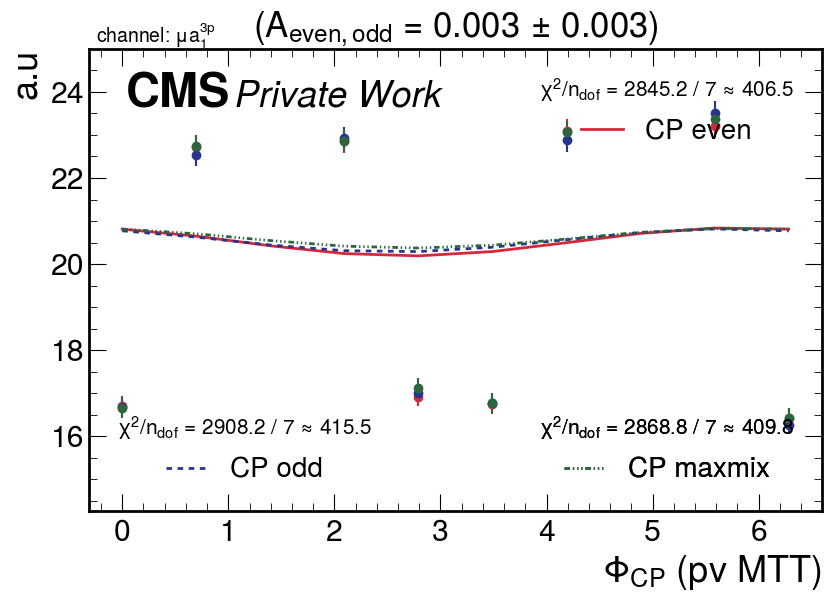

Processing tag: dp
Checking file: INPUT/04_DesyTau_phi_reorder_main_struc/ggF/combined_pickles/cp_all_all_configs_hist__var_phi_cp_mu_a1_3pr_pv_reco.pickle, looking for tag: dp
Skipping: INPUT/04_DesyTau_phi_reorder_main_struc/ggF/combined_pickles/cp_all_all_configs_hist__var_phi_cp_mu_a1_3pr_pv_reco.pickle
Checking file: INPUT/04_DesyTau_phi_reorder_main_struc/ggF/combined_pickles/cp_all_all_configs_hist__var_phi_cp_mu_a1_3pr_dp_reco.pickle, looking for tag: dp
Take file: INPUT/04_DesyTau_phi_reorder_main_struc/ggF/combined_pickles/cp_all_all_configs_hist__var_phi_cp_mu_a1_3pr_dp_reco.pickle
>>>---- Processing file : INPUT/04_DesyTau_phi_reorder_main_struc/ggF/combined_pickles/cp_all_all_configs_hist__var_phi_cp_mu_a1_3pr_dp_reco.pickle --->>>
>>>---- Tag & is_gen : dp Reco
combo_name :  cp_even_vs_cp_maxmix
combo_name :  cp_even_vs_cp_odd
combo_name :  cp_maxmix_vs_cp_odd


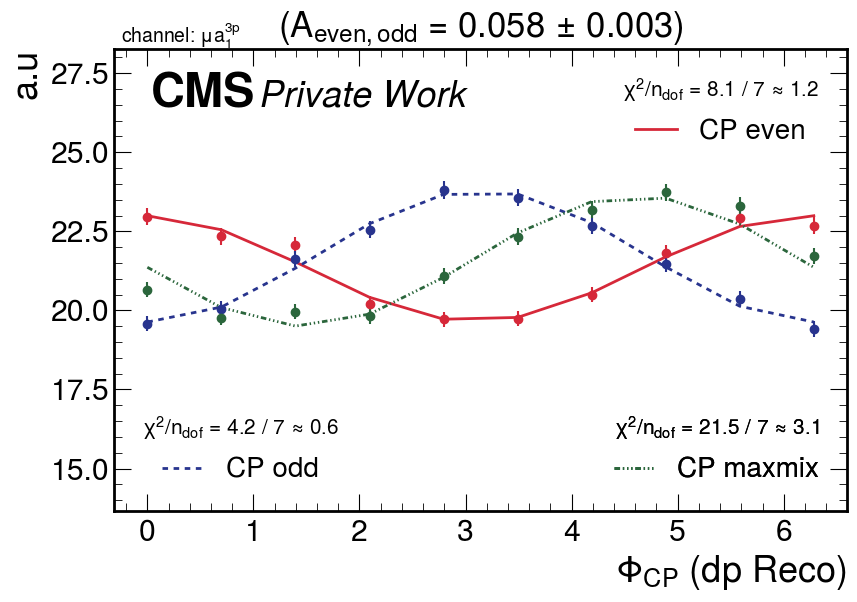

Checking file: INPUT/04_DesyTau_phi_reorder_main_struc/ggF/combined_pickles/cp_all_all_configs_hist__var_phi_cp_mu_a1_3pr_pv_gef.pickle, looking for tag: dp
Skipping: INPUT/04_DesyTau_phi_reorder_main_struc/ggF/combined_pickles/cp_all_all_configs_hist__var_phi_cp_mu_a1_3pr_pv_gef.pickle
Checking file: INPUT/04_DesyTau_phi_reorder_main_struc/ggF/combined_pickles/cp_all_all_configs_hist__var_phi_cp_mu_a1_3pr_pv_mtt.pickle, looking for tag: dp
Skipping: INPUT/04_DesyTau_phi_reorder_main_struc/ggF/combined_pickles/cp_all_all_configs_hist__var_phi_cp_mu_a1_3pr_pv_mtt.pickle
Loading file: INPUT/04_DesyTau_phi_reorder_main_struc/VBF/cpo/all_configs_hist__var_phi_cp_mu_a1_3pr_pv_mtt.pickle
Loading file: INPUT/04_DesyTau_phi_reorder_main_struc/VBF/mm/all_configs_hist__var_phi_cp_mu_a1_3pr_pv_mtt.pickle
Loading file: INPUT/04_DesyTau_phi_reorder_main_struc/VBF/sm/all_configs_hist__var_phi_cp_mu_a1_3pr_pv_mtt.pickle
✅ Bereits vorhanden: INPUT/04_DesyTau_phi_reorder_main_struc/VBF/combined_pickles

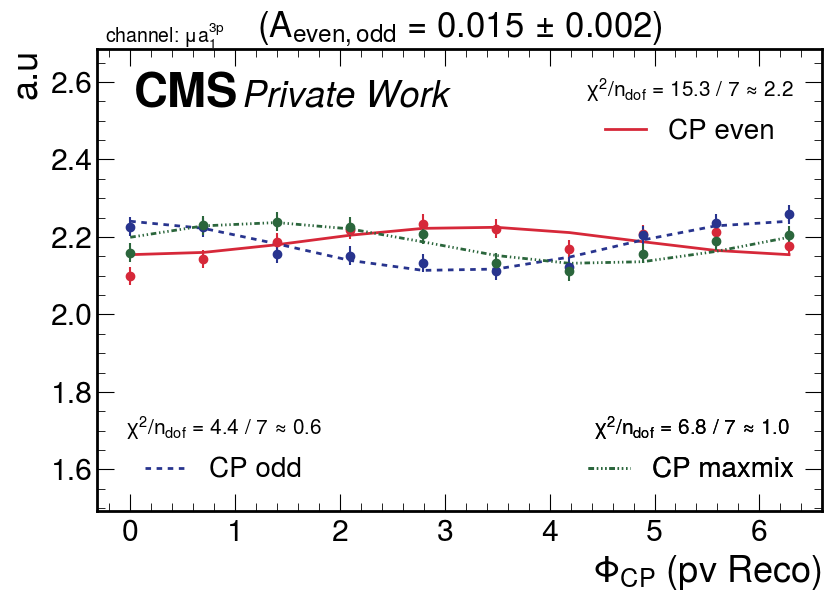

Checking file: INPUT/04_DesyTau_phi_reorder_main_struc/VBF/combined_pickles/cp_all_all_configs_hist__var_phi_cp_mu_a1_3pr_dp_reco.pickle, looking for tag: pv
Skipping: INPUT/04_DesyTau_phi_reorder_main_struc/VBF/combined_pickles/cp_all_all_configs_hist__var_phi_cp_mu_a1_3pr_dp_reco.pickle
Checking file: INPUT/04_DesyTau_phi_reorder_main_struc/VBF/combined_pickles/cp_all_all_configs_hist__var_phi_cp_mu_a1_3pr_pv_gef.pickle, looking for tag: pv
Take file: INPUT/04_DesyTau_phi_reorder_main_struc/VBF/combined_pickles/cp_all_all_configs_hist__var_phi_cp_mu_a1_3pr_pv_gef.pickle
>>>---- Processing file : INPUT/04_DesyTau_phi_reorder_main_struc/VBF/combined_pickles/cp_all_all_configs_hist__var_phi_cp_mu_a1_3pr_pv_gef.pickle --->>>
>>>---- Tag & is_gen : pv GEF
combo_name :  cp_even_vs_cp_maxmix
combo_name :  cp_even_vs_cp_odd
combo_name :  cp_maxmix_vs_cp_odd


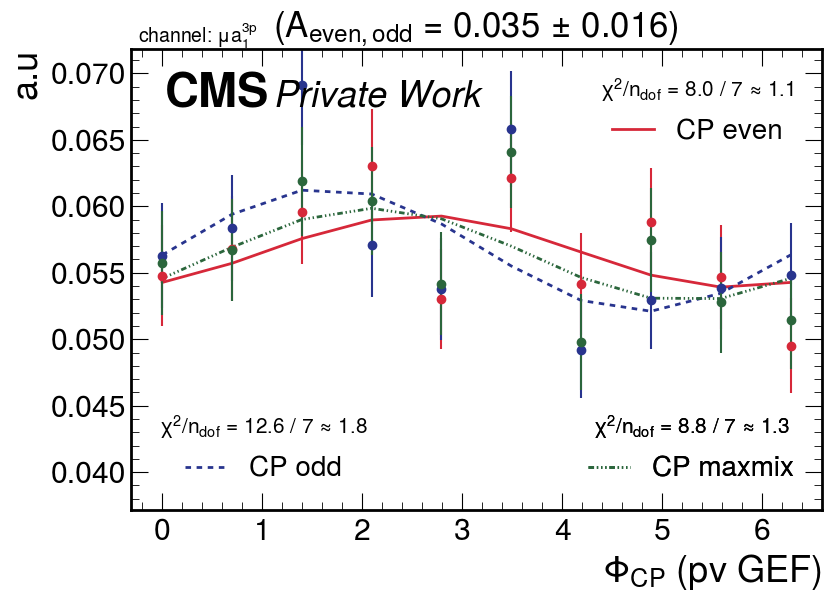

Checking file: INPUT/04_DesyTau_phi_reorder_main_struc/VBF/combined_pickles/cp_all_all_configs_hist__var_phi_cp_mu_a1_3pr_pv_mtt.pickle, looking for tag: pv
Take file: INPUT/04_DesyTau_phi_reorder_main_struc/VBF/combined_pickles/cp_all_all_configs_hist__var_phi_cp_mu_a1_3pr_pv_mtt.pickle
>>>---- Processing file : INPUT/04_DesyTau_phi_reorder_main_struc/VBF/combined_pickles/cp_all_all_configs_hist__var_phi_cp_mu_a1_3pr_pv_mtt.pickle --->>>
>>>---- Tag & is_gen : pv MTT
combo_name :  cp_even_vs_cp_maxmix
combo_name :  cp_even_vs_cp_odd
combo_name :  cp_maxmix_vs_cp_odd


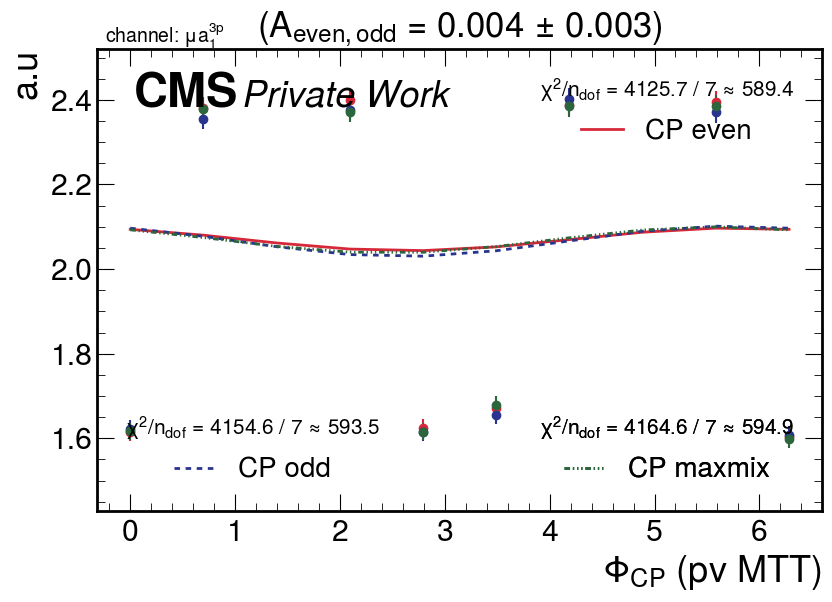

Processing tag: dp
Checking file: INPUT/04_DesyTau_phi_reorder_main_struc/VBF/combined_pickles/cp_all_all_configs_hist__var_phi_cp_mu_a1_3pr_pv_reco.pickle, looking for tag: dp
Skipping: INPUT/04_DesyTau_phi_reorder_main_struc/VBF/combined_pickles/cp_all_all_configs_hist__var_phi_cp_mu_a1_3pr_pv_reco.pickle
Checking file: INPUT/04_DesyTau_phi_reorder_main_struc/VBF/combined_pickles/cp_all_all_configs_hist__var_phi_cp_mu_a1_3pr_dp_reco.pickle, looking for tag: dp
Take file: INPUT/04_DesyTau_phi_reorder_main_struc/VBF/combined_pickles/cp_all_all_configs_hist__var_phi_cp_mu_a1_3pr_dp_reco.pickle
>>>---- Processing file : INPUT/04_DesyTau_phi_reorder_main_struc/VBF/combined_pickles/cp_all_all_configs_hist__var_phi_cp_mu_a1_3pr_dp_reco.pickle --->>>
>>>---- Tag & is_gen : dp Reco
combo_name :  cp_even_vs_cp_maxmix
combo_name :  cp_even_vs_cp_odd
combo_name :  cp_maxmix_vs_cp_odd


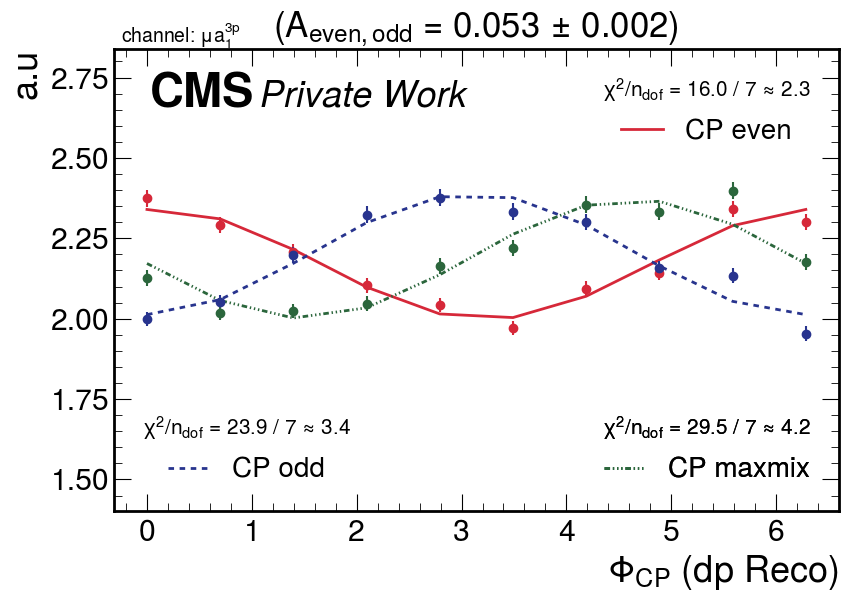

Checking file: INPUT/04_DesyTau_phi_reorder_main_struc/VBF/combined_pickles/cp_all_all_configs_hist__var_phi_cp_mu_a1_3pr_pv_gef.pickle, looking for tag: dp
Skipping: INPUT/04_DesyTau_phi_reorder_main_struc/VBF/combined_pickles/cp_all_all_configs_hist__var_phi_cp_mu_a1_3pr_pv_gef.pickle
Checking file: INPUT/04_DesyTau_phi_reorder_main_struc/VBF/combined_pickles/cp_all_all_configs_hist__var_phi_cp_mu_a1_3pr_pv_mtt.pickle, looking for tag: dp
Skipping: INPUT/04_DesyTau_phi_reorder_main_struc/VBF/combined_pickles/cp_all_all_configs_hist__var_phi_cp_mu_a1_3pr_pv_mtt.pickle


In [32]:
## Define the categories and tags
tags = ["pv", "dp"]


cat = r"$\mu a^{3p}_{1}$"

#chosen_category = "cat_mutau_sr", "cat_mutau_sr__tau2a1_3pr", "cat_mutau_sr__prompt__hig__cat2__tau2a1_3pr"
chosen_category = "cat_mutau_sr__tau2a1_3pr"

shiftdict = {
    "cp_even": {"shift": 150, "colour": "#d62839", "location": "upper right", "linestyle": "solid"},
    "cp_odd": {"shift": 151, "colour": "#28348e", "location": "lower left", "linestyle": (0, (2, 2))},
    "cp_maxmix": {"shift": 0, "colour": "#2b663c", "location": "lower right", "linestyle":(0, (2, 1, 0.5, 1, 0.5, 1, 0.5, 1))},
}
simpledict = {
    'cat_mutau_sr' : {'simple' : 'mutau_incl', 'math' : r'$\mu \tau$ inclusive'},
    'cat_mutau_sr__tau2a1_3pr' : {'simple' : 'mua13pr', 'math' : r'$\mu a^{3p}_{1}$'},
    'cat_mutau_sr__prompt__hig__cat2__tau2a1_3pr' : {'simple' : 'mua13pr_bdt', 'math' : r'$\mu a^{3p}_{1}$ BDT signal'}
}

dir_names = [ #"03_DesyTau_diff_pv_methods/ggF",
              #"03_DesyTau_diff_pv_methods/VBF",
              "04_DesyTau_phi_reorder_main_struc/ggF",
              "04_DesyTau_phi_reorder_main_struc/VBF"
            ]

for dir_name in dir_names:

    if "VBF" in dir_name:
        base = 12000
    else:
        base = 11000 #=ggF

    # CP mapping depending on process name
    if "VBF" in dir_name:
        process_map = {
            "h_vbf_htt_sm" : "cp_even",
            "h_vbf_htt_mm" : "cp_maxmix",
            "h_vbf_htt_cpo": "cp_odd",
        }
        is_vbf = "VBF"
    elif "ggF" in dir_name:
        process_map = {
            "h_ggf_htt_sm_prod_sm" : "cp_even",
            "h_ggf_htt_mm_prod_sm" : "cp_maxmix",
            "h_ggf_htt_cpo_prod_sm": "cp_odd",
        }
        is_vbf = "ggF"
    else:
        process_map = {}  # for control or other categories
        is_vbf = "control"

    
    ## Combine the Pickle files if needed
    subdirs = [
        "cpo",
        "mm",
        "sm"
    ]
    
    base_dir = os.path.join("INPUT", dir_name)
    place_combined_pickels = os.path.join(base_dir, "combined_pickles")
    output_dir = os.path.join("OUTPUT", dir_name)
    os.makedirs(place_combined_pickels, exist_ok=True)
    os.makedirs(output_dir, exist_ok=True)
    
    
    #file_names = set(os.path.basename(f) for f in glob.glob(os.path.join(base_dir, subdirs[0], "*.pickle"))) # 4(configs)x2(methods) files
    for subdir in subdirs:
        folder = os.path.join(base_dir, subdir)

        for suffix in ["pv", "dp"]: #tags
            # tous les fichiers *_pv.pickle (ou *_dp.pickle) du sous-dossier
            all_files = glob.glob(os.path.join(folder, f"*_{suffix}*.pickle"))

            # Grouper par nom commun sans le préfixe (preee, postee, prebpix, postbpix)
            groups = {}
            for path in all_files:
                name = os.path.basename(path)
                # Ignore déjà les fichiers all_configs_...
                if name.startswith("all_configs_"):
                    continue
                # retirer le préfixe avant le 1er "_"
                common_name = name.split("_", 1)[1]  
                groups.setdefault(common_name, []).append(path)

            # Fusionner chaque groupe
                for common_name, file_list in groups.items():
                    combined = None
                    for fpath in file_list:
                        with open(fpath, "rb") as f:
                            hist = pickle.load(f)
                            if combined is None:
                                combined = hist.copy()
                            else:
                                combined += hist  # somme bin-à-bin

                    # Sauver le pickle combiné
                    output_path = os.path.join(folder, f"all_configs_{common_name}")
                    with open(output_path, "wb") as f:
                        pickle.dump(combined, f)
                    #print(f"✅ {subdir}: Sauvé {output_path}")
                    
    # === NEU: Kombiniere alle CP-Histogramme (cpo, sm, mm) ===
    file_names = set(os.path.basename(f) for f in glob.glob(os.path.join(base_dir, subdirs[0], "all_configs_*.pickle")))

    for file_name in file_names:
        histograms_per_cp = {}

        # Load histograms from each subdir
        for subdir in subdirs:
            file_path = os.path.join(base_dir, subdir, file_name)
            print("Loading file:", file_path)
            
            if not os.path.exists(file_path):
                print(f"⚠️ Datei fehlt: {file_path}, skip")
                continue

            with open(file_path, 'rb') as f:
                hist = pickle.load(f)
                # Check which cats exist
                #begin = "cat_mutau_sr__"
                #for cat in hist.axes['category']:
                #    if cat.startswith(begin):
                #        print(cat)
                # Kategorie auswählen, falls nötig
                hist = hist[{"category": chosen_category}]

            # Extract histograms per process name
            histograms_per_cp[subdir] = hist


        combined_output_path = os.path.join(place_combined_pickels, f"cp_all_{file_name}")
        if os.path.exists(combined_output_path):
            print(f"✅ Bereits vorhanden: {combined_output_path}, skip")
            continue

        # Combine histograms
        cp_keys = list(histograms_per_cp.keys())
        combined_hist = histograms_per_cp[cp_keys[0]].copy()
        for cp_key in cp_keys[1:]:
            combined_hist += histograms_per_cp[cp_key]

        with open(combined_output_path, 'wb') as f:
            pickle.dump(combined_hist, f)
        print(f"✅ Gespeichert: {combined_output_path}")


    
    
    ## Loop over the tags and categories, do the fitting and save the results
    for tag in tags:  # Loop over tags
        print(f"Processing tag: {tag}")
        file_list = glob.glob(f"{base_dir}/combined_pickles/cp_all_all_configs_hist__*.pickle", recursive=True)

        
        for file in file_list:
            print(f"Checking file: {file}, looking for tag: {tag}")
            if tag in file:
                print(f"Take file: {file}")
            if tag not in file:
                print(f"Skipping: {file}")
                continue

            if "dp" in tag and "reco" in file:
                is_gen = "Reco"
            elif "dp" in tag and "gen" in file:
                is_gen = "Gen"
            elif "pv" in tag and "reco" in file:
                is_gen = "Reco"
            elif "pv" in tag and "mtt" in file:
                is_gen = "MTT"
            elif "pv" in tag and "gef" in file:
                is_gen = "GEF"
            elif "pv" in tag and "gen" in file:
                is_gen = "Gen"
            else:
                is_gen = tag
                print("!file outside is_gen categories!")
    
            
            tag_kind = f"{tag} {is_gen}"
            print(f">>>---- Processing file : {file} --->>>")
            print(f">>>---- Tag & is_gen : {tag_kind}")
            fileptr = open(file, 'rb')
            data = pickle.load(fileptr)
            nbin = data.shape[2]
            fileptr.close()
    
            if not hasattr(data, 'axes'):
                print(f"Warning: 'axes' not found in {file}. Skipping...")
                continue
    
            axes = data.axes
            process_axis  = axes['process']
    
            cparray = {}
            for proc_name, cp_key in process_map.items():
                if proc_name not in process_axis:
                    print(f"⚠️ {proc_name} not found in process_axis")
                    continue
                idx = process_axis.index(proc_name)
                values = data[idx, :, :].values()
                errors = data[idx, :, :].variances() ** 0.5
                cparray[cp_key] = {
                    "values": values,
                    "errors": errors,
                    "colour": shiftdict[cp_key]["colour"],
                    "location": shiftdict[cp_key]["location"],
                    "linestyle": shiftdict[cp_key]["linestyle"],
                }
    
    
            def model(x, a, b, c):
                return a*np.cos(x+c) + b
    
            def fit(x, y, err=0.05, model=model):
                lsq = LeastSquares(x, y, err, model)
                m = Minuit(lsq, a=0.1, b=0.1, c=1.0)
                #m.scan(ncall=100)
                m.fixed = False
                m.migrad()  # finds minimum of least_squares function
                m.hesse()  # accurately computes uncertainties
                return m, err, m.values["a"], m.errors["a"], m.values["b"], m.errors["b"], m.values["c"]
    
            def comp_asymmetry(arr1, arr2):
                # https://github.com/Ksavva1021/TIDAL/blob/656f992ae056b3fed0061f2b3efb49905c39834d/CP_Tools/scripts/assymetry.py#L26
                return (1/arr1.size)*np.sum(np.abs((arr1-arr2)/(arr1+arr2)))
    
            def comp_asymmetry_error(arr1, arr2, err1, err2): #arr = array of values, err = array of errors
                # Terms for partial derivatives
                denom = arr1 + arr2
                term1 = err1 * np.abs((2 * arr2) / (denom**2))
                term2 = err2 * np.abs((2 * arr1) / (denom**2))
                # Propagate errors
                sigma_A = np.sqrt(np.sum(term1**2 + term2**2)) / arr1.size
                return sigma_A
    
            x = np.linspace(0., 2*np.pi, nbin)

                
            plt.figure(figsize=(8.9, 6.6))
            hep.cms.text("Private Work", loc=1)
            line_width = 2
            legend_line_width = line_width
    
            ## Initialise category in data_storage if not already there
            if cat not in data_storage:
                data_storage[cat] = {
                    f"{dir_name}": {},  # Initialise the tags key to store per-category tags
                }
            if dir_name not in data_storage[cat]:
                data_storage[cat][dir_name] = {}
            if tag_kind not in data_storage[cat][dir_name]:
                data_storage[cat][dir_name][tag_kind] = {}
    
            for hyp, shift_props in shiftdict.items():  # Loop over hypotheses
                if hyp not in cparray: #such that plot works also with less than all cp hypotheses
                    print(f"⚠️ {hyp} not found in cparray, skipping")
                    continue
                shift, colour, location, linestyle = shift_props["shift"], shift_props["colour"], shift_props["location"], shift_props["linestyle"]
                #print("hyp : ", hyp, "shift_props :", shift_props) #hyp = shift
    
                hypothesis_zip = cparray[hyp]  # gives per hypothesis: {'values': array, 'errors': array, '...': 'black', 'location': '...'}
                hypothesis_fit_vals, hypothesis_fit_errs = np.ravel(hypothesis_zip["values"]), np.ravel(hypothesis_zip["errors"])
    
                # Fit the Hypothesis
                m, err, a, sigma_a, b, sigma_b, c = fit(x, hypothesis_fit_vals, hypothesis_fit_errs)
    
    
                if tag_kind not in data_storage[cat][dir_name]:  
                    data_storage[cat][dir_name][tag_kind] = {}  # Initialise tag_kind in [tag_kind] if not already there
    
                data_storage[cat][dir_name][tag_kind][hyp] = {  # Directly use hypothesis name
                    "values": np.array(hypothesis_fit_vals), # hypothesis_fit_vals.tolist(),
                    "err": err,
                    "colour": colour,
                    "location": location,
                    #"m": m,
                }
    
    
                # Plot the results
                plt.errorbar(x, hypothesis_fit_vals, hypothesis_fit_errs, fmt="o", color=colour)
                fit_curve = model(x, *m.values)
                plt.plot(x, fit_curve, color=colour, linestyle=linestyle, linewidth=line_width)
                fit_info = [
                    f"$\\chi^2$/$n_\\mathrm{{dof}}$ = {m.fval:.1f} / {m.ndof:.0f} ≈ {m.fmin.reduced_chi2:.1f}",
                ]
                legend_handle = Line2D([0], [0], color=colour, linestyle=linestyle, linewidth=legend_line_width, label=f"CP {hyp[3:]}")
                legend = plt.legend(handles=[legend_handle], title="\n".join(fit_info), frameon=False, loc=location, fontsize=20, title_fontsize=15)
                plt.gca().add_artist(legend)
    
                fit_y_min = np.min(fit_curve)
                fit_y_max = np.max(fit_curve)
                y_min = fit_y_min - 0.3 * fit_y_min
                y_max = fit_y_max + 0.2 * fit_y_max
                plt.ylim(y_min, y_max)

            # Alle vorhandenen Hypothesen in cparray
            existing_hyps = list(cparray.keys())
    
            #for category1, category2 in itertools.combinations(shiftdict.keys(), 2):  # Loop over pairs of hypotheses (asymmetry calculations)
            for category1, category2 in itertools.combinations(existing_hyps, 2):  # Loop over pairs of existing hypotheses (asymmetry calculations)
                hypothesis1 = np.ravel(cparray[category1]["values"])
                hypothesis2 = np.ravel(cparray[category2]["values"])
                error1 = np.ravel(cparray[category1]["errors"])
                error2 = np.ravel(cparray[category2]["errors"])
    
                asymmetry = comp_asymmetry(hypothesis1, hypothesis2)
                asymmetry_error = comp_asymmetry_error(hypothesis1, hypothesis2, error1, error2)
    
                combo_name = f"{category1}_vs_{category2}"
                print("combo_name : ", combo_name)
    
                if combo_name not in data_storage[cat][dir_name][tag_kind]:
                    data_storage[cat][dir_name][tag_kind][combo_name] = {}  # Initialize combo_name under tag_kind if not already there
    
                # Store the asymmetry result for this category and tag_kind
                data_storage[cat][dir_name][tag_kind][combo_name]["asymmetry_val"] = asymmetry
                data_storage[cat][dir_name][tag_kind][combo_name]["asymmetry_error"] = asymmetry_error
    
    
            # Save the final plot
            asymmetry_val_even_odd = data_storage[cat][dir_name][tag_kind]["cp_even_vs_cp_odd"]["asymmetry_val"]
            asymmetry_error_even_odd = data_storage[cat][dir_name][tag_kind]["cp_even_vs_cp_odd"]["asymmetry_error"]
            asymmetry_val_even_odd_rounded = round(asymmetry_val_even_odd, 3)
            asymmetry_error_even_odd_rounded = round(asymmetry_error_even_odd, 3)
    
            x_label = r"$\Phi_{CP}$" + f" ({tag_kind})"
            #if is_gen == "Gen":
            #    x_label += " (Gen)"

            info_text = 'channel: ' + simpledict[chosen_category]['math']

            if info_text:
                plt.annotate(info_text, xy=(0.01, 1.012), xycoords="axes fraction", fontsize=14,
                         bbox=dict(boxstyle="round,pad=0.3", facecolor='none', edgecolor='none'))
    
            plt.xlabel(x_label)
            plt.ylabel("a.u")
            plt.title(f"($A_{{even,odd}}$ = {asymmetry_val_even_odd_rounded}$\\,\\pm\\,${asymmetry_error_even_odd_rounded})", fontsize=25, loc='center')
            plt.tight_layout()
            plt.savefig(f"{output_dir}/{chosen_category}_{tag_kind}_{is_vbf}.pdf", dpi=300)
            plt.show()
                

In [26]:
def print_nested_keys(d, prefix=''):
    if isinstance(d, dict):
        for key, value in d.items():
            new_prefix = f'{prefix} -> {key}' if prefix else key
            print(new_prefix)
            print_nested_keys(value, new_prefix)

print_nested_keys(data_storage)

$\mu a^{3p}_{1}$
$\mu a^{3p}_{1}$ -> 01_DesyTau/control_plots
$\mu a^{3p}_{1}$ -> 01_DesyTau/control_plots -> pv Reco
$\mu a^{3p}_{1}$ -> 01_DesyTau/control_plots -> pv Reco -> cp_even
$\mu a^{3p}_{1}$ -> 01_DesyTau/control_plots -> pv Reco -> cp_even -> values
$\mu a^{3p}_{1}$ -> 01_DesyTau/control_plots -> pv Reco -> cp_even -> err
$\mu a^{3p}_{1}$ -> 01_DesyTau/control_plots -> pv Reco -> cp_even -> colour
$\mu a^{3p}_{1}$ -> 01_DesyTau/control_plots -> pv Reco -> cp_even -> location
$\mu a^{3p}_{1}$ -> 01_DesyTau/control_plots -> pv Reco -> cp_odd
$\mu a^{3p}_{1}$ -> 01_DesyTau/control_plots -> pv Reco -> cp_odd -> values
$\mu a^{3p}_{1}$ -> 01_DesyTau/control_plots -> pv Reco -> cp_odd -> err
$\mu a^{3p}_{1}$ -> 01_DesyTau/control_plots -> pv Reco -> cp_odd -> colour
$\mu a^{3p}_{1}$ -> 01_DesyTau/control_plots -> pv Reco -> cp_odd -> location
$\mu a^{3p}_{1}$ -> 01_DesyTau/control_plots -> pv Reco -> cp_maxmix
$\mu a^{3p}_{1}$ -> 01_DesyTau/control_plots -> pv Reco -> cp_maxmix -

# Compare the asymmetries + errors

In [17]:
colour_palette = ['#d62839', '#28348e', '#2b663c']

def compare_asymmetries_pv(data_storage, selected_cats=None, selected_datasets=None, selected_tags=None, selected_keys=None):
    if selected_cats is None:
        selected_cats = list(data_storage.keys())
    if selected_datasets is None:
        selected_datasets = [ds for cat in selected_cats for ds in data_storage[cat].keys()]
    if selected_keys is None:
        selected_keys = [key for cat in selected_cats for ds in selected_datasets for tag in selected_tags for key in data_storage[cat][ds].get(tag, {}).keys()]

    print('selected_cats', selected_cats)
    print('selected_datasets:', selected_datasets)
    print('selected_tags', selected_tags)
    print('selected_keys', selected_keys)

    first_path = selected_datasets[0]
    output_path = first_path.split('/')[0]
    output_dir = os.path.join('OUTPUT', output_path)
    os.makedirs(output_dir, exist_ok=True)                            # Output-Ordner erstellen, falls nicht existent

    used_tags = {}

    for tag in selected_tags:
        words = tag.split()
    
        # extract method
        first = words[0].lower()
        if first == 'dp':
            method = 'dp'
        elif first == 'pv':
            method = 'pv'
        else:
            method = ''

        # extract reconstruction
        second = ' '.join(words[1:]).lower()
        if 'gen' in second:
            reco_label = r'gen $p_T^{\tau}$'
        elif 'reco' in second:
            reco_label = r'visible $p_T^{\tau}$'
        elif 'mtt' in second:
            reco_label = r'fastMTT $p_T^{\tau}$'
        elif 'gef' in second:
            reco_label = r'GEF $p_T^{\tau}$'
        else:
            reco_label = tag  # fallback

        # assemble final label
        if method:
            used_tags[tag] = fr'{method} {reco_label}'
        else:
            used_tags[tag] = reco_label


    info_text = []
    
    if len(selected_cats) == 1:
        if selected_cats[0] == '$\\mu a^{3p}_{1}$':
            info_text.append(r'Category $\mu a^{3p}$')
        else:
            info_text.append(f'Category : {selected_cats[0]}')
    if len(selected_datasets) == 1:
        info_text.append(f'Version : {selected_datasets[0]}')
    if len(selected_tags) == 1:
        info_text.append(f'Method : {selected_tags[0]}')
    if len(selected_keys) == 1:
        info_text.append(f'Asymmetry of : {selected_keys[0]}')

    # Replace _ with spaces
    info_text = '\n'.join(line.replace('_', ' ').replace('cp', 'CP') for line in info_text) if info_text else None

    asymmetry_values = []
    asymmetry_errors = []
    labels = []
    colours = []
    dir_names = []  # <--- New list to store dir_name

    colour_map = {dir_name: colour_palette[i % len(colour_palette)] for i, dir_name in enumerate(selected_datasets)}
    legend_handles = {}

    for cat in selected_cats:
        if cat not in data_storage:
            continue

        for dir_name in selected_datasets:
            print('dir_name 1) : ', dir_name)
            if dir_name not in data_storage[cat]:
                continue
            colour = colour_map[dir_name]
            if dir_name not in legend_handles:
                legend_handles[dir_name] = plt.Line2D([0], [0], marker='o', color=colour, linestyle='None', label=dir_name)

            available_tags = [tag for tag in selected_tags if tag in data_storage[cat][dir_name]]

            for tag in available_tags:
                for key in selected_keys:
                    if key in data_storage[cat][dir_name][tag]:
                        data_entry = data_storage[cat][dir_name][tag][key]

                        if '_vs_' in key and 'asymmetry_val' in data_entry and 'asymmetry_error' in data_entry:
                            asymmetry_values.append(data_entry['asymmetry_val'])
                            asymmetry_errors.append(data_entry['asymmetry_error'])
                            dir_names.append(dir_name)  # <--- store dir_name as well

                            label_parts = []
                            if len(selected_cats) > 1:
                                label_parts.append(cat)
                            if len(selected_tags) > 1:
                                label_parts.append(tag)
                            if len(selected_keys) > 1:
                                label_parts.append(key)

                            labels.append(' - '.join(label_parts))
                            colours.append(colour)


    asymmetry_values = np.array(asymmetry_values)
    asymmetry_errors = np.array(asymmetry_errors)

    plt.figure(figsize=(7.7, 5.5))
    hep.cms.text('Private work', loc=0)

    unique_labels = list(dict.fromkeys(labels))
    label_to_xpos = {label: i for i, label in enumerate(unique_labels)}
    # Make sure that all lists are of the same length
    assert len(labels) == len(asymmetry_values) == len(asymmetry_errors) == len(dir_names)

    max_values = {}
    max_errors = {}
    max_values_vbf = {}
    max_errors_vbf = {}

    # Use dir_names to correctly assign ggF and VBF
    for label, value, error, dir_name in zip(labels, asymmetry_values, asymmetry_errors, dir_names):
        print('dir_name : ', dir_name)
        if 'VBF' in dir_name:  # if VBF-Dataset
            print(f'VBF erkannt: {dir_name}, label: {label}, value: {value}')
            if label not in max_values_vbf or value > max_values_vbf[label]:
                max_values_vbf[label] = value
                max_errors_vbf[label] = error
        else:  # if ggF-Dataset
            print(f'ggF erkannt: {dir_name}, label: {label}, value: {value}')

            if label not in max_values or value > max_values[label]:
                max_values[label] = value
                max_errors[label] = error
    filtered_labels = list(set(max_values.keys()) | set(max_values_vbf.keys()))
    print('filtered_labels: ',filtered_labels)
    filtered_values = [max_values.get(label, 0) for label in filtered_labels]
    filtered_errors = [max_errors.get(label, 0) for label in filtered_labels]

    filtered_values_vbf = [max_values_vbf.get(label, 0) for label in filtered_labels]
    filtered_errors_vbf = [max_errors_vbf.get(label, 0) for label in filtered_labels]

    filtered_x_positions = [label_to_xpos[label] for label in filtered_labels]
    
    width = 0.19
    gap = 0.02
    
    # Plot bars for ggF
    plt.bar(filtered_x_positions, filtered_values, yerr=filtered_errors, width=width, label='ggF', color=colour_palette[0], capsize=5)
    # Plot bars for VBF slightly shifted to the right
    plt.bar([x + width + gap for x in filtered_x_positions], filtered_values_vbf, yerr=filtered_errors_vbf, width=width, label='VBF', color=colour_palette[1], capsize=5)

    # Labels, legend, and formatting
    plt.legend()
    
    for label, max_val in max_values.items():
        max_err = max_errors[label]
        x_pos = label_to_xpos[label]

    if asymmetry_values.size > 0:
        A_y_min = np.min(asymmetry_values)
        A_y_max = np.max(asymmetry_values)
        y_max = A_y_max + 0.4 * A_y_max
        plt.ylim(0, y_max)

    mapped_labels = [used_tags.get(label, label) for label in filtered_labels]
    #plt.xticks(ticks=filtered_x_positions, labels=mapped_labels, rotation=45)
    plt.xticks(ticks=[x + (width / 2) + (gap / 2) for x in filtered_x_positions], labels=mapped_labels, rotation=45)


    plt.margins(x=0.1)
    plt.ylabel('Asymmetry')
    #plt.title('Comparison of Asymmetries', pad=45)

    if info_text:
        plt.annotate(info_text, xy=(0.05, 0.83), xycoords='axes fraction', fontsize=14,
                     bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white'))
    
    plt.grid()
    plt.savefig(f'{output_dir}/Asymmetry_DesyTau_diff.pdf', dpi=300, bbox_inches='tight')
    plt.show()

selected_cats ['$\\mu a^{3p}_{1}$']
selected_datasets: ['03_DesyTau_diff_pv_methods/ggF', '03_DesyTau_diff_pv_methods/VBF']
selected_tags ['dp Reco', 'pv Reco', 'pv MTT', 'pv GEF']
selected_keys ['cp_even_vs_cp_odd']
dir_name 1) :  03_DesyTau_diff_pv_methods/ggF
dir_name 1) :  03_DesyTau_diff_pv_methods/VBF
dir_name :  03_DesyTau_diff_pv_methods/ggF
ggF erkannt: 03_DesyTau_diff_pv_methods/ggF, label: dp Reco, value: 0.05759571242953011
dir_name :  03_DesyTau_diff_pv_methods/ggF
ggF erkannt: 03_DesyTau_diff_pv_methods/ggF, label: pv Reco, value: 0.05759571242953011
dir_name :  03_DesyTau_diff_pv_methods/ggF
ggF erkannt: 03_DesyTau_diff_pv_methods/ggF, label: pv MTT, value: 0.003847929062523964
dir_name :  03_DesyTau_diff_pv_methods/ggF
ggF erkannt: 03_DesyTau_diff_pv_methods/ggF, label: pv GEF, value: 0.028548961843637612
dir_name :  03_DesyTau_diff_pv_methods/VBF
VBF erkannt: 03_DesyTau_diff_pv_methods/VBF, label: dp Reco, value: 0.053083664213987726
dir_name :  03_DesyTau_diff_pv_meth

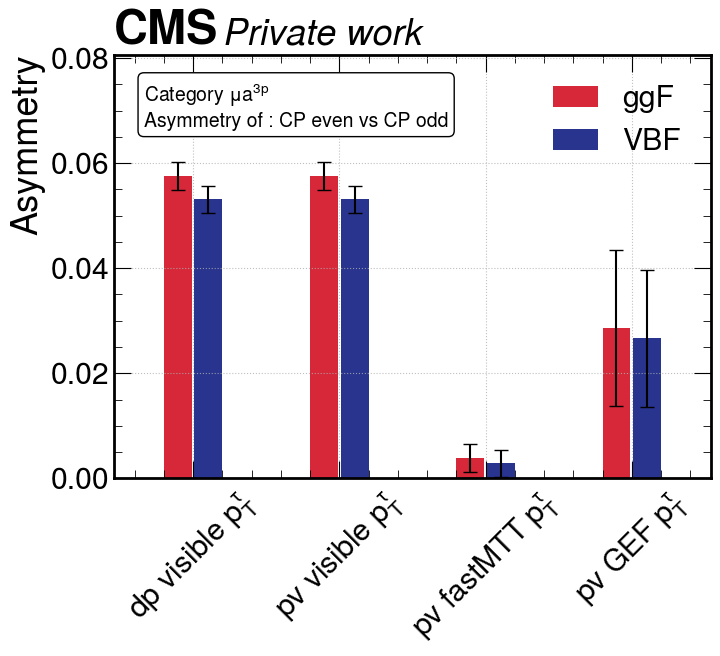

In [18]:
compare_asymmetries_pv(
    data_storage,
    selected_cats=['$\\mu a^{3p}_{1}$'],
    selected_datasets=['03_DesyTau_diff_pv_methods/ggF', '03_DesyTau_diff_pv_methods/VBF'],
    selected_tags=['dp Reco', 'pv Reco', 'pv MTT', 'pv GEF'],
    selected_keys=['cp_even_vs_cp_odd']
)


selected_cats ['$\\mu a^{3p}_{1}$']
selected_datasets: ['04_DesyTau_phi_reorder_main_struc/ggF', '04_DesyTau_phi_reorder_main_struc/VBF']
selected_tags ['dp Reco', 'pv Reco', 'pv MTT', 'pv GEF']
selected_keys ['cp_even_vs_cp_odd']
dir_name 1) :  04_DesyTau_phi_reorder_main_struc/ggF
dir_name 1) :  04_DesyTau_phi_reorder_main_struc/VBF
dir_name :  04_DesyTau_phi_reorder_main_struc/ggF
ggF erkannt: 04_DesyTau_phi_reorder_main_struc/ggF, label: dp Reco, value: 0.057622042910636245
dir_name :  04_DesyTau_phi_reorder_main_struc/ggF
ggF erkannt: 04_DesyTau_phi_reorder_main_struc/ggF, label: pv Reco, value: 0.017931608233667778
dir_name :  04_DesyTau_phi_reorder_main_struc/ggF
ggF erkannt: 04_DesyTau_phi_reorder_main_struc/ggF, label: pv MTT, value: 0.0034589752474524075
dir_name :  04_DesyTau_phi_reorder_main_struc/ggF
ggF erkannt: 04_DesyTau_phi_reorder_main_struc/ggF, label: pv GEF, value: 0.024717063415982322
dir_name :  04_DesyTau_phi_reorder_main_struc/VBF
VBF erkannt: 04_DesyTau_phi_re

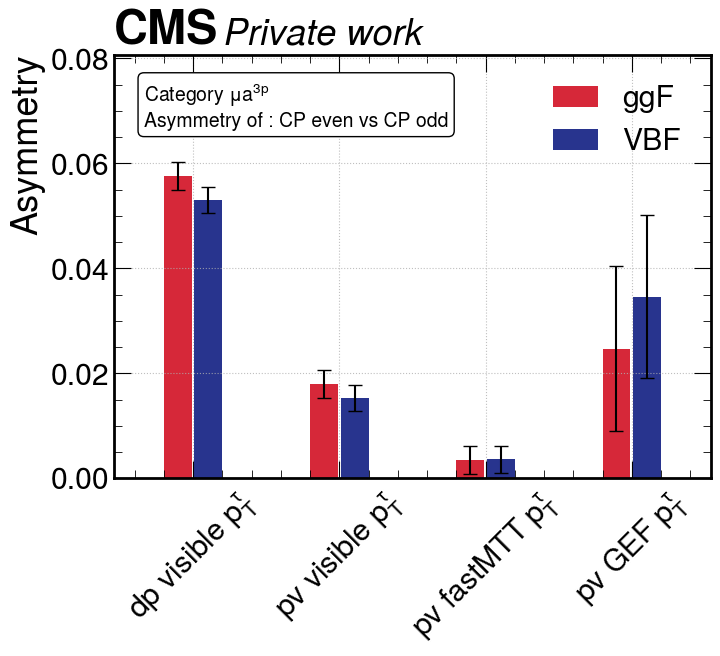

In [19]:
compare_asymmetries_pv(
    data_storage,
    selected_cats=['$\\mu a^{3p}_{1}$'],
    selected_datasets=['04_DesyTau_phi_reorder_main_struc/ggF', '04_DesyTau_phi_reorder_main_struc/VBF'],
    selected_tags=['dp Reco', 'pv Reco','pv MTT', 'pv GEF'],
    selected_keys=['cp_even_vs_cp_odd']
)


In [52]:
# Before saving: convert defaultdict to dict
data_storage_dict = {k: dict(v) for k, v in data_storage.items()}

# Save data_storage to YAML
with open('data_storage_DesyTau.pkl', 'wb') as file:
    pickle.dump(data_storage_dict, file) 


Loading file: INPUT/04_DesyTau_phi_reorder_main_struc/ggF/cpo/all_configs_hist__var_phi_cp_mu_a1_3pr_pv_reco.pickle
Loading file: INPUT/04_DesyTau_phi_reorder_main_struc/ggF/mm/all_configs_hist__var_phi_cp_mu_a1_3pr_pv_reco.pickle
Loading file: INPUT/04_DesyTau_phi_reorder_main_struc/ggF/sm/all_configs_hist__var_phi_cp_mu_a1_3pr_pv_reco.pickle
✅ Bereits vorhanden: INPUT/04_DesyTau_phi_reorder_main_struc/ggF/combined_pickles/cp_all_all_configs_hist__var_phi_cp_mu_a1_3pr_pv_reco.pickle, skip
Loading file: INPUT/04_DesyTau_phi_reorder_main_struc/ggF/cpo/all_configs_hist__var_phi_cp_mu_a1_3pr_pv_mtt.pickle
Loading file: INPUT/04_DesyTau_phi_reorder_main_struc/ggF/mm/all_configs_hist__var_phi_cp_mu_a1_3pr_pv_mtt.pickle
Loading file: INPUT/04_DesyTau_phi_reorder_main_struc/ggF/sm/all_configs_hist__var_phi_cp_mu_a1_3pr_pv_mtt.pickle
✅ Bereits vorhanden: INPUT/04_DesyTau_phi_reorder_main_struc/ggF/combined_pickles/cp_all_all_configs_hist__var_phi_cp_mu_a1_3pr_pv_mtt.pickle, skip
Loading file: 

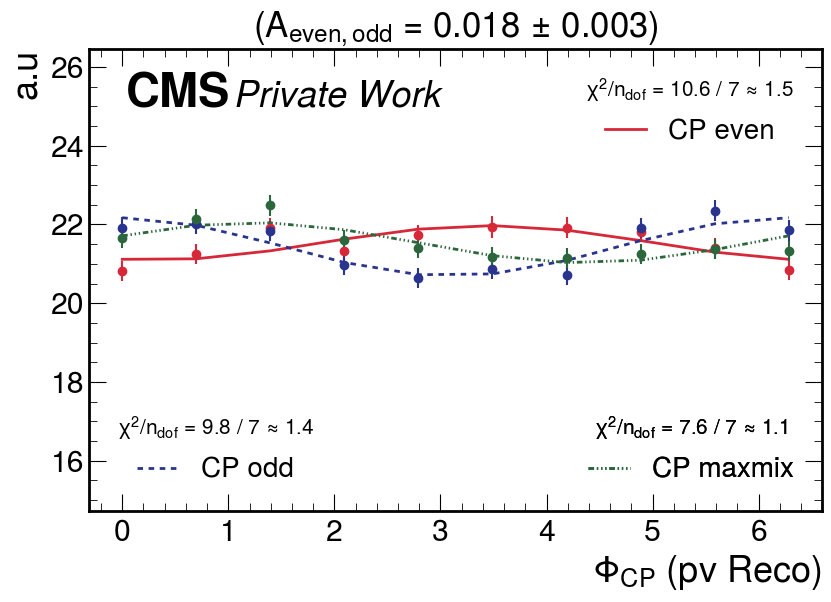

Checking file: INPUT/04_DesyTau_phi_reorder_main_struc/ggF/combined_pickles/cp_all_all_configs_hist__var_phi_cp_mu_a1_3pr_dp_reco.pickle, looking for tag: pv
Skipping: INPUT/04_DesyTau_phi_reorder_main_struc/ggF/combined_pickles/cp_all_all_configs_hist__var_phi_cp_mu_a1_3pr_dp_reco.pickle
Checking file: INPUT/04_DesyTau_phi_reorder_main_struc/ggF/combined_pickles/cp_all_all_configs_hist__var_phi_cp_mu_a1_3pr_pv_gef.pickle, looking for tag: pv
Take file: INPUT/04_DesyTau_phi_reorder_main_struc/ggF/combined_pickles/cp_all_all_configs_hist__var_phi_cp_mu_a1_3pr_pv_gef.pickle
>>>---- Processing file : INPUT/04_DesyTau_phi_reorder_main_struc/ggF/combined_pickles/cp_all_all_configs_hist__var_phi_cp_mu_a1_3pr_pv_gef.pickle --->>>
>>>---- Tag & is_gen : pv GEF
combo_name :  cp_even_vs_cp_maxmix
combo_name :  cp_even_vs_cp_odd
combo_name :  cp_maxmix_vs_cp_odd


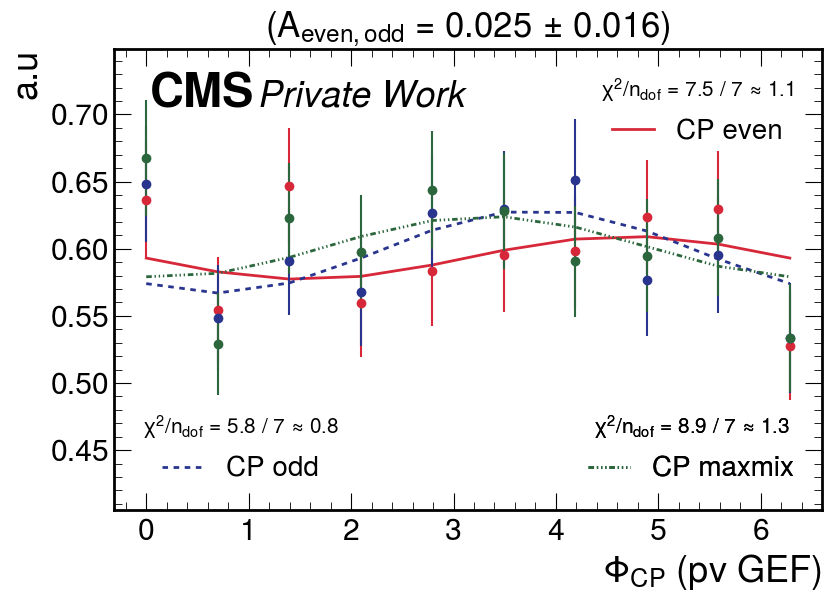

Checking file: INPUT/04_DesyTau_phi_reorder_main_struc/ggF/combined_pickles/cp_all_all_configs_hist__var_phi_cp_mu_a1_3pr_pv_mtt.pickle, looking for tag: pv
Take file: INPUT/04_DesyTau_phi_reorder_main_struc/ggF/combined_pickles/cp_all_all_configs_hist__var_phi_cp_mu_a1_3pr_pv_mtt.pickle
>>>---- Processing file : INPUT/04_DesyTau_phi_reorder_main_struc/ggF/combined_pickles/cp_all_all_configs_hist__var_phi_cp_mu_a1_3pr_pv_mtt.pickle --->>>
>>>---- Tag & is_gen : pv MTT
combo_name :  cp_even_vs_cp_maxmix
combo_name :  cp_even_vs_cp_odd
combo_name :  cp_maxmix_vs_cp_odd


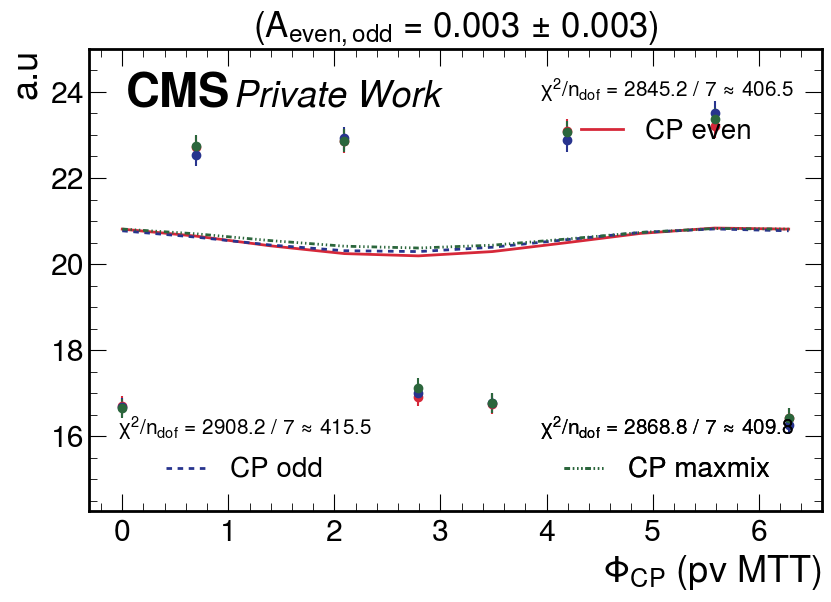

Processing tag: dp
Checking file: INPUT/04_DesyTau_phi_reorder_main_struc/ggF/combined_pickles/cp_all_all_configs_hist__var_phi_cp_mu_a1_3pr_pv_reco.pickle, looking for tag: dp
Skipping: INPUT/04_DesyTau_phi_reorder_main_struc/ggF/combined_pickles/cp_all_all_configs_hist__var_phi_cp_mu_a1_3pr_pv_reco.pickle
Checking file: INPUT/04_DesyTau_phi_reorder_main_struc/ggF/combined_pickles/cp_all_all_configs_hist__var_phi_cp_mu_a1_3pr_dp_reco.pickle, looking for tag: dp
Take file: INPUT/04_DesyTau_phi_reorder_main_struc/ggF/combined_pickles/cp_all_all_configs_hist__var_phi_cp_mu_a1_3pr_dp_reco.pickle
>>>---- Processing file : INPUT/04_DesyTau_phi_reorder_main_struc/ggF/combined_pickles/cp_all_all_configs_hist__var_phi_cp_mu_a1_3pr_dp_reco.pickle --->>>
>>>---- Tag & is_gen : dp Reco
combo_name :  cp_even_vs_cp_maxmix
combo_name :  cp_even_vs_cp_odd
combo_name :  cp_maxmix_vs_cp_odd


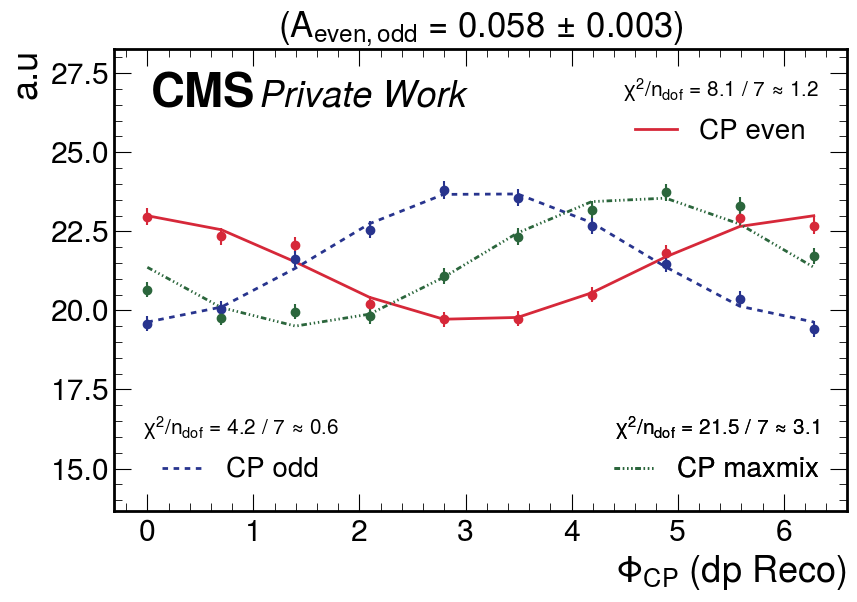

Checking file: INPUT/04_DesyTau_phi_reorder_main_struc/ggF/combined_pickles/cp_all_all_configs_hist__var_phi_cp_mu_a1_3pr_pv_gef.pickle, looking for tag: dp
Skipping: INPUT/04_DesyTau_phi_reorder_main_struc/ggF/combined_pickles/cp_all_all_configs_hist__var_phi_cp_mu_a1_3pr_pv_gef.pickle
Checking file: INPUT/04_DesyTau_phi_reorder_main_struc/ggF/combined_pickles/cp_all_all_configs_hist__var_phi_cp_mu_a1_3pr_pv_mtt.pickle, looking for tag: dp
Skipping: INPUT/04_DesyTau_phi_reorder_main_struc/ggF/combined_pickles/cp_all_all_configs_hist__var_phi_cp_mu_a1_3pr_pv_mtt.pickle
Loading file: INPUT/04_DesyTau_phi_reorder_main_struc/VBF/cpo/all_configs_hist__var_phi_cp_mu_a1_3pr_pv_reco.pickle
Loading file: INPUT/04_DesyTau_phi_reorder_main_struc/VBF/mm/all_configs_hist__var_phi_cp_mu_a1_3pr_pv_reco.pickle
Loading file: INPUT/04_DesyTau_phi_reorder_main_struc/VBF/sm/all_configs_hist__var_phi_cp_mu_a1_3pr_pv_reco.pickle
✅ Bereits vorhanden: INPUT/04_DesyTau_phi_reorder_main_struc/VBF/combined_pick

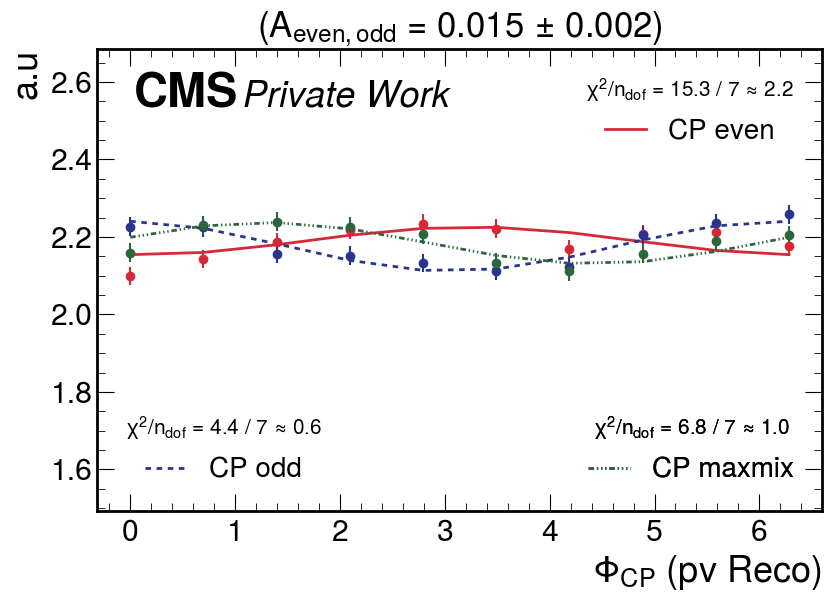

Checking file: INPUT/04_DesyTau_phi_reorder_main_struc/VBF/combined_pickles/cp_all_all_configs_hist__var_phi_cp_mu_a1_3pr_dp_reco.pickle, looking for tag: pv
Skipping: INPUT/04_DesyTau_phi_reorder_main_struc/VBF/combined_pickles/cp_all_all_configs_hist__var_phi_cp_mu_a1_3pr_dp_reco.pickle
Checking file: INPUT/04_DesyTau_phi_reorder_main_struc/VBF/combined_pickles/cp_all_all_configs_hist__var_phi_cp_mu_a1_3pr_pv_gef.pickle, looking for tag: pv
Take file: INPUT/04_DesyTau_phi_reorder_main_struc/VBF/combined_pickles/cp_all_all_configs_hist__var_phi_cp_mu_a1_3pr_pv_gef.pickle
>>>---- Processing file : INPUT/04_DesyTau_phi_reorder_main_struc/VBF/combined_pickles/cp_all_all_configs_hist__var_phi_cp_mu_a1_3pr_pv_gef.pickle --->>>
>>>---- Tag & is_gen : pv GEF
combo_name :  cp_even_vs_cp_maxmix
combo_name :  cp_even_vs_cp_odd
combo_name :  cp_maxmix_vs_cp_odd


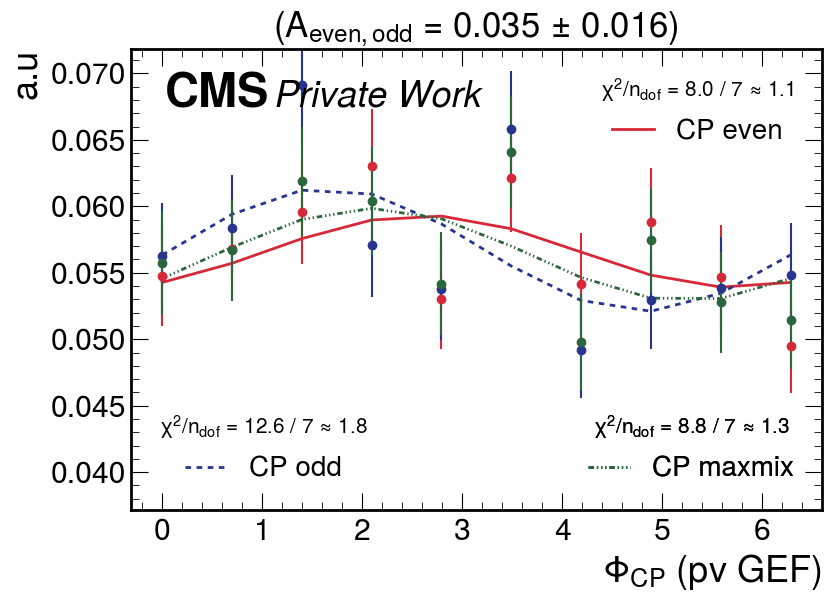

Checking file: INPUT/04_DesyTau_phi_reorder_main_struc/VBF/combined_pickles/cp_all_all_configs_hist__var_phi_cp_mu_a1_3pr_pv_mtt.pickle, looking for tag: pv
Take file: INPUT/04_DesyTau_phi_reorder_main_struc/VBF/combined_pickles/cp_all_all_configs_hist__var_phi_cp_mu_a1_3pr_pv_mtt.pickle
>>>---- Processing file : INPUT/04_DesyTau_phi_reorder_main_struc/VBF/combined_pickles/cp_all_all_configs_hist__var_phi_cp_mu_a1_3pr_pv_mtt.pickle --->>>
>>>---- Tag & is_gen : pv MTT
combo_name :  cp_even_vs_cp_maxmix
combo_name :  cp_even_vs_cp_odd
combo_name :  cp_maxmix_vs_cp_odd


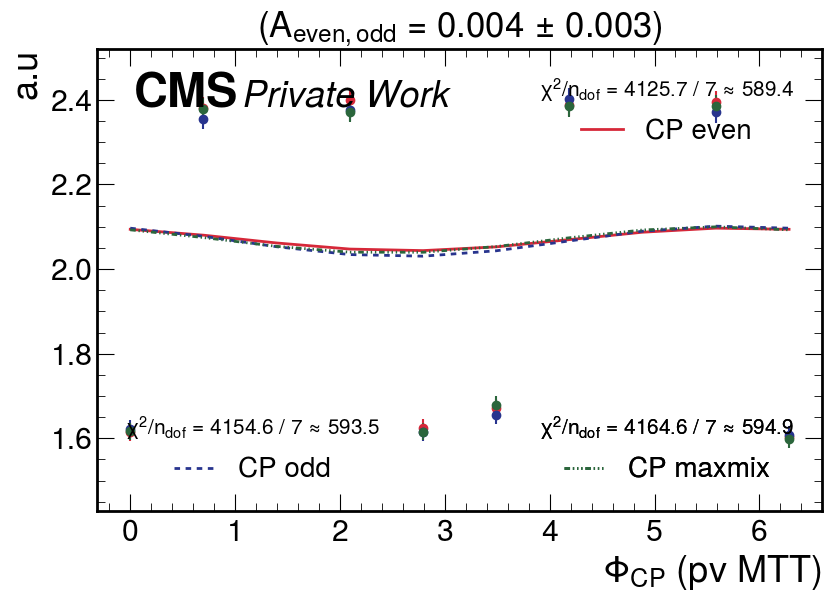

Processing tag: dp
Checking file: INPUT/04_DesyTau_phi_reorder_main_struc/VBF/combined_pickles/cp_all_all_configs_hist__var_phi_cp_mu_a1_3pr_pv_reco.pickle, looking for tag: dp
Skipping: INPUT/04_DesyTau_phi_reorder_main_struc/VBF/combined_pickles/cp_all_all_configs_hist__var_phi_cp_mu_a1_3pr_pv_reco.pickle
Checking file: INPUT/04_DesyTau_phi_reorder_main_struc/VBF/combined_pickles/cp_all_all_configs_hist__var_phi_cp_mu_a1_3pr_dp_reco.pickle, looking for tag: dp
Take file: INPUT/04_DesyTau_phi_reorder_main_struc/VBF/combined_pickles/cp_all_all_configs_hist__var_phi_cp_mu_a1_3pr_dp_reco.pickle
>>>---- Processing file : INPUT/04_DesyTau_phi_reorder_main_struc/VBF/combined_pickles/cp_all_all_configs_hist__var_phi_cp_mu_a1_3pr_dp_reco.pickle --->>>
>>>---- Tag & is_gen : dp Reco
combo_name :  cp_even_vs_cp_maxmix
combo_name :  cp_even_vs_cp_odd
combo_name :  cp_maxmix_vs_cp_odd


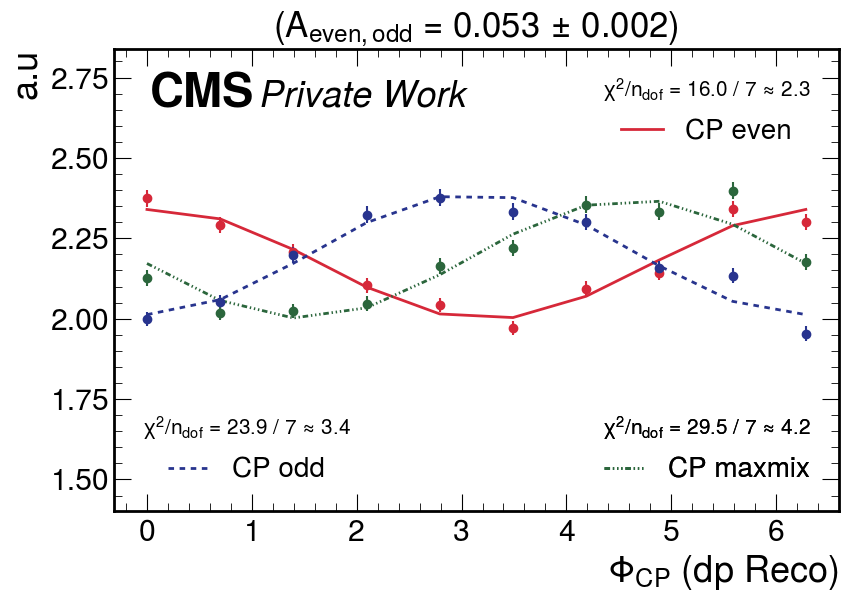

Checking file: INPUT/04_DesyTau_phi_reorder_main_struc/VBF/combined_pickles/cp_all_all_configs_hist__var_phi_cp_mu_a1_3pr_pv_gef.pickle, looking for tag: dp
Skipping: INPUT/04_DesyTau_phi_reorder_main_struc/VBF/combined_pickles/cp_all_all_configs_hist__var_phi_cp_mu_a1_3pr_pv_gef.pickle
Checking file: INPUT/04_DesyTau_phi_reorder_main_struc/VBF/combined_pickles/cp_all_all_configs_hist__var_phi_cp_mu_a1_3pr_pv_mtt.pickle, looking for tag: dp
Skipping: INPUT/04_DesyTau_phi_reorder_main_struc/VBF/combined_pickles/cp_all_all_configs_hist__var_phi_cp_mu_a1_3pr_pv_mtt.pickle


In [4]:
## Define the categories and tags
tags = ['pv', 'dp']


cat = r'$\mu a^{3p}_{1}$'

#chosen_category = 'cat_mutau_sr'
chosen_category = 'cat_mutau_sr__tau2a1_3pr'

dir_names = [ #'03_DesyTau_diff_pv_methods/ggF',
              #'03_DesyTau_diff_pv_methods/VBF',
              '04_DesyTau_phi_reorder_main_struc/ggF',
              '04_DesyTau_phi_reorder_main_struc/VBF'
            ]

for dir_name in dir_names:

    if 'VBF' in dir_name:
        base = 12000
    else:
        base = 11000 #=ggF
    
    shiftdict = {
        'cp_even': {'shift': 150, 'colour': '#d62839', 'location': 'upper right', 'linestyle': 'solid'},
        'cp_odd': {'shift': 151, 'colour': '#28348e', 'location': 'lower left', 'linestyle': (0, (2, 2))},
        'cp_maxmix': {'shift': 0, 'colour': '#2b663c', 'location': 'lower right', 'linestyle':(0, (2, 1, 0.5, 1, 0.5, 1, 0.5, 1))},
    }

    # CP mapping depending on process name
    if 'VBF' in dir_name:
        process_map = {
            'h_vbf_htt_sm': 'cp_even',
            'h_vbf_htt_mm': 'cp_maxmix',
            'h_vbf_htt_cpo': 'cp_odd',
        }
        is_vbf = 'VBF'
    elif 'ggF' in dir_name:
        process_map = {
            'h_ggf_htt_sm_prod_sm': 'cp_even',
            'h_ggf_htt_mm_prod_sm': 'cp_maxmix',
            'h_ggf_htt_cpo_prod_sm': 'cp_odd',
        }
        is_vbf = 'ggF'
    else:
        process_map = {}  # for control or other categories
        is_vbf = 'control'

    
    cp_map = {
        'sm': 'cp_even',
        'cpo': 'cp_odd',
        'mm': 'cp_maxmix',
    }
    
    simpledict = {
        r'$\mu \pi$'     : 'mupi',
        r'$\mu \rho$'    : 'murho',
        r'$\mu a^{3p}_{1}$' : 'mua13pr',
        r'$\mu \tau$' : 'mutau',
        r'$\rho \rho 0j$' : 'rhorho0j',
    }
    
    ## Combine the Pickle files if needed
    
    subdirs = [
        'cpo',
        'mm',
        'sm'
    ]
    
    base_dir = os.path.join('INPUT', dir_name)
    place_combined_pickels = os.path.join(base_dir, 'combined_pickles')
    output_dir = os.path.join('OUTPUT', dir_name)
    os.makedirs(place_combined_pickels, exist_ok=True)
    os.makedirs(output_dir, exist_ok=True)
    
    
    #file_names = set(os.path.basename(f) for f in glob.glob(os.path.join(base_dir, subdirs[0], '*.pickle'))) # 4(configs)x2(methods) files
    for subdir in subdirs:
        folder = os.path.join(base_dir, subdir)

        for suffix in ['pv', 'dp']: #tags
            # tous les fichiers *_pv.pickle (ou *_dp.pickle) du sous-dossier
            all_files = glob.glob(os.path.join(folder, f'*_{suffix}*.pickle'))

            # Grouper par nom commun sans le préfixe (preee, postee, prebpix, postbpix)
            groups = {}
            for path in all_files:
                name = os.path.basename(path)
                # Ignore déjà les fichiers all_configs_...
                if name.startswith('all_configs_'):
                    continue
                # retirer le préfixe avant le 1er '_'
                common_name = name.split('_', 1)[1]  
                groups.setdefault(common_name, []).append(path)

            # Fusionner chaque groupe
                for common_name, file_list in groups.items():
                    combined = None
                    for fpath in file_list:
                        with open(fpath, 'rb') as f:
                            hist = pickle.load(f)
                            if combined is None:
                                combined = hist.copy()
                            else:
                                combined += hist  # somme bin-à-bin

                    # Sauver le pickle combiné
                    output_path = os.path.join(folder, f'all_configs_{common_name}')
                    with open(output_path, 'wb') as f:
                        pickle.dump(combined, f)
                    #print(f'✅ {subdir}: Sauvé {output_path}')
                    
    # === NEU: Kombiniere alle CP-Histogramme (cpo, sm, mm) ===
    file_names = set(os.path.basename(f) for f in glob.glob(os.path.join(base_dir, subdirs[0], 'all_configs_*.pickle')))

    for file_name in file_names:
        histograms_per_cp = {}

        # Load histograms from each subdir
        for subdir in subdirs:
            file_path = os.path.join(base_dir, subdir, file_name)
            print('Loading file:', file_path)
            
            if not os.path.exists(file_path):
                print(f'⚠️ Datei fehlt: {file_path}, skip')
                continue

            with open(file_path, 'rb') as f:
                hist = pickle.load(f)
                # Kategorie auswählen, falls nötig
                hist = hist[{'category': chosen_category}]

            # Extract histograms per process name
            histograms_per_cp[subdir] = hist


        combined_output_path = os.path.join(place_combined_pickels, f'cp_all_{file_name}')
        if os.path.exists(combined_output_path):
            print(f'✅ Bereits vorhanden: {combined_output_path}, skip')
            continue

        # Combine histograms
        cp_keys = list(histograms_per_cp.keys())
        combined_hist = histograms_per_cp[cp_keys[0]].copy()
        for cp_key in cp_keys[1:]:
            combined_hist += histograms_per_cp[cp_key]

        with open(combined_output_path, 'wb') as f:
            pickle.dump(combined_hist, f)
        print(f'✅ Gespeichert: {combined_output_path}')


    
    
    ## Loop over the tags and categories, do the fitting and save the results
    for tag in tags:  # Loop over tags
        print(f'Processing tag: {tag}')
        file_list = glob.glob(f'{base_dir}/combined_pickles/cp_all_all_configs_hist__*.pickle', recursive=True)

        
        for file in file_list:
            print(f'Checking file: {file}, looking for tag: {tag}')
            if tag in file:
                print(f'Take file: {file}')
            if tag not in file:
                print(f'Skipping: {file}')
                continue

            if 'dp' in tag and 'reco' in file:
                is_gen = 'Reco'
            elif 'dp' in tag and 'gen' in file:
                is_gen = 'Gen'
            elif 'pv' in tag and 'reco' in file:
                is_gen = 'Reco'
            elif 'pv' in tag and 'mtt' in file:
                is_gen = 'MTT'
            elif 'pv' in tag and 'gef' in file:
                is_gen = 'GEF'
            elif 'pv' in tag and 'gen' in file:
                is_gen = 'Gen'
            else:
                is_gen = tag
                print('!file outside is_gen categories!')
    
            
            tag_kind = f'{tag} {is_gen}'
            print(f'>>>---- Processing file : {file} --->>>')
            print(f'>>>---- Tag & is_gen : {tag_kind}')
            fileptr = open(file, 'rb')
            data = pickle.load(fileptr)
            nbin = data.shape[2]
            fileptr.close()
    
            if not hasattr(data, 'axes'):
                print(f'Warning: 'axes' not found in {file}. Skipping...')
                continue
    
            axes = data.axes
            process_axis  = axes['process']
    
            cparray = {}
            for proc_name, cp_key in process_map.items():
                if proc_name not in process_axis:
                    print(f'⚠️ {proc_name} not found in process_axis')
                    continue
                idx = process_axis.index(proc_name)
                values = data[idx, :, :].values()
                errors = data[idx, :, :].variances() ** 0.5
                cparray[cp_key] = {
                    'values': values,
                    'errors': errors,
                    'colour': shiftdict[cp_key]['colour'],
                    'location': shiftdict[cp_key]['location'],
                    'linestyle': shiftdict[cp_key]['linestyle'],
                }
    
    
            def model(x, a, b, c):
                return a*np.cos(x+c) + b
    
            def fit(x, y, err=0.05, model=model):
                lsq = LeastSquares(x, y, err, model)
                m = Minuit(lsq, a=0.1, b=0.1, c=1.0)
                #m.scan(ncall=100)
                m.fixed = False
                m.migrad()  # finds minimum of least_squares function
                m.hesse()  # accurately computes uncertainties
                return m, err, m.values['a'], m.errors['a'], m.values['b'], m.errors['b'], m.values['c']
    
            def comp_asymmetry(arr1, arr2):
                # https://github.com/Ksavva1021/TIDAL/blob/656f992ae056b3fed0061f2b3efb49905c39834d/CP_Tools/scripts/assymetry.py#L26
                return (1/arr1.size)*np.sum(np.abs((arr1-arr2)/(arr1+arr2)))
    
            def comp_asymmetry_error(arr1, arr2, err1, err2): #arr = array of values, err = array of errors
                # Terms for partial derivatives
                denom = arr1 + arr2
                term1 = err1 * np.abs((2 * arr2) / (denom**2))
                term2 = err2 * np.abs((2 * arr1) / (denom**2))
                # Propagate errors
                sigma_A = np.sqrt(np.sum(term1**2 + term2**2)) / arr1.size
                return sigma_A
    
            x = np.linspace(0., 2*np.pi, nbin)

                
            plt.figure(figsize=(8.9, 6.6))
            hep.cms.text('Private Work', loc=1)
            line_width = 2
            legend_line_width = line_width
    
            ## Initialise category in data_storage if not already there
            if cat not in data_storage:
                data_storage[cat] = {
                    f'{dir_name}': {},  # Initialise the tags key to store per-category tags
                }
            if dir_name not in data_storage[cat]:
                data_storage[cat][dir_name] = {}
            if tag_kind not in data_storage[cat][dir_name]:
                data_storage[cat][dir_name][tag_kind] = {}
    
            for hyp, shift_props in shiftdict.items():  # Loop over hypotheses
                if hyp not in cparray: #such that plot works also with less than all cp hypotheses
                    print(f'⚠️ {hyp} not found in cparray, skipping')
                    continue
                shift, colour, location, linestyle = shift_props['shift'], shift_props['colour'], shift_props['location'], shift_props['linestyle']
                #print('hyp : ', hyp, 'shift_props :', shift_props) #hyp = shift
    
                hypothesis_zip = cparray[hyp]  # gives per hypothesis: {'values': array, 'errors': array, '...': 'black', 'location': '...'}
                hypothesis_fit_vals, hypothesis_fit_errs = np.ravel(hypothesis_zip['values']), np.ravel(hypothesis_zip['errors'])
    
                # Fit the Hypothesis
                m, err, a, sigma_a, b, sigma_b, c = fit(x, hypothesis_fit_vals, hypothesis_fit_errs)
    
    
                if tag_kind not in data_storage[cat][dir_name]:  
                    data_storage[cat][dir_name][tag_kind] = {}  # Initialise tag_kind in [tag_kind] if not already there
    
                data_storage[cat][dir_name][tag_kind][hyp] = {  # Directly use hypothesis name
                    'values': np.array(hypothesis_fit_vals), # hypothesis_fit_vals.tolist(),
                    'err': err,
                    'colour': colour,
                    'location': location,
                    #'m': m,
                }
    
    
                # Plot the results
                plt.errorbar(x, hypothesis_fit_vals, hypothesis_fit_errs, fmt='o', color=colour)
                fit_curve = model(x, *m.values)
                plt.plot(x, fit_curve, color=colour, linestyle=linestyle, linewidth=line_width)
                fit_info = [
                    f'$\\chi^2$/$n_\\mathrm{{dof}}$ = {m.fval:.1f} / {m.ndof:.0f} ≈ {m.fmin.reduced_chi2:.1f}',
                ]
                legend_handle = Line2D([0], [0], color=colour, linestyle=linestyle, linewidth=legend_line_width, label=f'CP {hyp[3:]}')
                legend = plt.legend(handles=[legend_handle], title='\n'.join(fit_info), frameon=False, loc=location, fontsize=20, title_fontsize=15)
                plt.gca().add_artist(legend)
    
                fit_y_min = np.min(fit_curve)
                fit_y_max = np.max(fit_curve)
                y_min = fit_y_min - 0.3 * fit_y_min
                y_max = fit_y_max + 0.2 * fit_y_max
                plt.ylim(y_min, y_max)

            # Alle vorhandenen Hypothesen in cparray
            existing_hyps = list(cparray.keys())
    
            #for category1, category2 in itertools.combinations(shiftdict.keys(), 2):  # Loop over pairs of hypotheses (asymmetry calculations)
            for category1, category2 in itertools.combinations(existing_hyps, 2):  # Loop over pairs of existing hypotheses (asymmetry calculations)
                hypothesis1 = np.ravel(cparray[category1]['values'])
                hypothesis2 = np.ravel(cparray[category2]['values'])
                error1 = np.ravel(cparray[category1]['errors'])
                error2 = np.ravel(cparray[category2]['errors'])
    
                asymmetry = comp_asymmetry(hypothesis1, hypothesis2)
                asymmetry_error = comp_asymmetry_error(hypothesis1, hypothesis2, error1, error2)
    
                combo_name = f'{category1}_vs_{category2}'
                print('combo_name : ', combo_name)
    
                if combo_name not in data_storage[cat][dir_name][tag_kind]:
                    data_storage[cat][dir_name][tag_kind][combo_name] = {}  # Initialize combo_name under tag_kind if not already there
    
                # Store the asymmetry result for this category and tag_kind
                data_storage[cat][dir_name][tag_kind][combo_name]['asymmetry_val'] = asymmetry
                data_storage[cat][dir_name][tag_kind][combo_name]['asymmetry_error'] = asymmetry_error
    
    
            # Save the final plot
            asymmetry_val_even_odd = data_storage[cat][dir_name][tag_kind]['cp_even_vs_cp_odd']['asymmetry_val']
            asymmetry_error_even_odd = data_storage[cat][dir_name][tag_kind]['cp_even_vs_cp_odd']['asymmetry_error']
            asymmetry_val_even_odd_rounded = round(asymmetry_val_even_odd, 3)
            asymmetry_error_even_odd_rounded = round(asymmetry_error_even_odd, 3)
    
            x_label = r'$\Phi_{CP}$' + f' ({tag_kind})'
            #if is_gen == 'Gen':
            #    x_label += ' (Gen)'
    
            plt.xlabel(x_label)
            plt.ylabel('a.u')
            plt.title(f'($A_{{even,odd}}$ = {asymmetry_val_even_odd_rounded}$\\,\\pm\\,${asymmetry_error_even_odd_rounded})', fontsize=25, loc='center')
            plt.tight_layout()
            plt.savefig(f'{output_dir}/{tag_kind}_{is_vbf}.pdf', dpi=300)
            plt.show()
                